# Laboratory No. 1. Statistical Inference
## Probabilistical Principal Component Analisys
## presented by: Juan David Gil and Juan Sebastián Silva
## Date: 22 february 2016

In [40]:
% pylab inline
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pylab as pb
from matplotlib import cm

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


First the data is loaded from the files

In [96]:
digits = []
for i in range(0,9):
    file_name = "digit" + str(i) + ".csv"
    X = np.loadtxt(open(file_name,"rb"),delimiter=",")
    digits.append(X)

In order to avoid numerical problems the data is normalized first.

In [97]:
# Normalizing Data
for i in range(0,9):
    X = digits[i]
    for j in range(0,X.shape[0]):
        for k in range(0,X.shape[1]):
            X[j,k] = X[j,k]/255.0 # normalizing by the maximum value of the image
    digits[i] = X
#print digits[0][0,:]

In [151]:
# Expectation maximization algorithm
# input: Data, dimensions and latent space dimensions
# output: Projection matrix, sigma, Expected value of z and sample mean
def PPCA(XX, D, M=10):
    Qold = 0.0
    Qnew = 1.0
    EPS = 0.00001
    W_estim = np.random.random_sample((D,M))
    W_estim = np.matrix(W_estim)
    XX = np.matrix(XX)
    sigma_estim = 10.0
    cont = 0
    N = XX.shape[0]
    sample_mean = np.sum(XX, axis=0) # Sample mean
    sample_mean = sample_mean*(1.0/N) # sample mean
    
    #print sample_mean
    covariances = []
    for i in range(0,N):
        tmp = np.zeros((M,M))
        tmp = np.matrix(tmp)
        covariances.append(tmp)

    m1 = np.copy(XX)
    m1 = np.matrix(m1)
    m1_norm = np.zeros((XX.shape[0],1))
    m1_norm = np.matrix(m1_norm)

    # Computing the squared norm of X - sample mean
    for i in range(0, XX.shape[0]):
        m1[i,:] = m1[i,:] - sample_mean
        m1_norm[i,0] = np.asscalar(m1[i,:]*m1[i,:].T) 

    super_exp_z = 0
    #mostrar = np.copy(XX[300,:])
    while(np.fabs(Qold - Qnew) >= EPS and cont <= 200):
        # Compute the expected values
        M_tmp = W_estim.T*W_estim + sigma_estim*np.eye(M) 
        exp_z = (np.linalg.inv(M_tmp)*W_estim.T)*(m1.T)
        super_exp_z = np.copy(exp_z)
        for i in range(0,N):        
            tmp_cov = ((sigma_estim)*np.linalg.inv(M_tmp)) + np.outer(exp_z[:,i],exp_z[:,i].T)
            covariances[i] = tmp_cov        

        # Update parameters   
        #     W estimation   
        W_estim = (m1.T*exp_z.T)
        super_cov_z = covariances[0]    
        for i in range(1,N):
            super_cov_z += covariances[i]

        W_estim = W_estim*np.linalg.inv(super_cov_z)    
        #     Sigma Estimation
        sigma_estim = 0.0
        for i in range(0,N):         
            sigma_estim += m1_norm[i,0] - np.asscalar((2.0*(exp_z[:,i].T*W_estim.T*m1[i,:].T))) + np.trace(covariances[i]*W_estim.T*W_estim)        
        sigma_estim *= (1.0/(N*D))
        cont += 1

    return W_estim, sigma_estim, super_exp_z, sample_mean

In [152]:
def evalReconstruction(W_estim, super_exp_z, sample_mean, digits, des_digit=0):
    X_rec = W_estim*super_exp_z #+ np.sqrt(sigma_estim)
    for i in range(0,X_rec.shape[1]):
        X_rec[:,i] = X_rec[:,i] + sample_mean.T

    X_rec = X_rec.T
    X_real = digits[des_digit]
    SSD = 0.0
    for i in range(0, X_rec.shape[0]):
        diff = X_rec[i,:] - X_real[i,:]
        diff = diff*diff.T
        SSD += asscalar(diff)
    
    Z_Rec = X_rec[300,:]
    Z_Rec = Z_Rec.reshape((28,28))    
    return Z_Rec, SSD/X_rec.shape[0]

###For testing the PCA a databse of digits will be used, two digits will be chosen to apply the PCA, in this case the digit tree and digit five

## Recovering Digit 3 with several latent space dimensions

reconstruction error for M = 1 39.3616060976
reconstruction error for M = 5 26.7575325546
reconstruction error for M = 10 20.4768921727
reconstruction error for M = 50 7.20448809457
reconstruction error for M = 200 5.67559560401


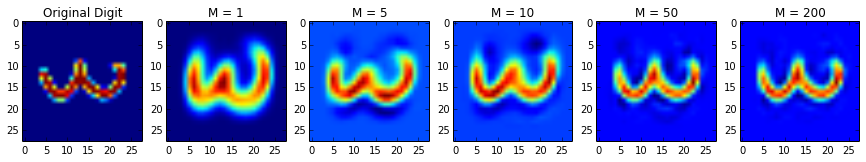

In [157]:
digit_to_use = 3
plt.figure(1, figsize=(15, 6))
plt.subplot(161)
plt.title('Original Digit')
plt.imshow(digits[digit_to_use][300,:].reshape(28,28))

cont = 1
mdims = [1, 5, 10, 50, 200]
for i in mdims:
    W_estim, sigma_estim, super_exp_z, sample_mean = PPCA(digits[digit_to_use], digits[digit_to_use].shape[1], i)
    z_rec, error_ssd = evalReconstruction(W_estim, super_exp_z, sample_mean, digits, digit_to_use)
    print 'reconstruction error for M = ' + str(i), error_ssd
    cont += 1
    plt.subplot(1,6,cont)
    plt.title('M = ' + str(i))
    plt.imshow(z_rec)

It can be seen that the resconstruction it's more loyal to the original as the value of M increases as well as the error of reconstruction given by the SSD(Sum of square diferences). The computing time considerably increases when the latent dimension is higher.

## Recovering Digit 5 with several latent space dimensions

reconstruction error for M = 1 37.8291229205
reconstruction error for M = 5 26.0796531781
reconstruction error for M = 10 19.7068774299
reconstruction error for M = 50 6.85636103039
reconstruction error for M = 200 5.57774064348


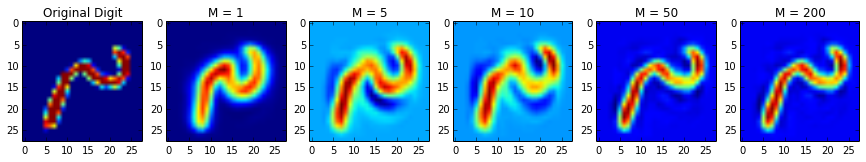

In [159]:
digit_to_use = 5
plt.figure(2, figsize=(15, 6))
plt.subplot(161)
plt.title('Original Digit')
plt.imshow(digits[digit_to_use][300,:].reshape(28,28))

cont = 1
mdims = [1, 5, 10, 50, 200]
for i in mdims:
    W_estim, sigma_estim, super_exp_z, sample_mean = PPCA(digits[digit_to_use], digits[digit_to_use].shape[1], i)
    z_rec, error_ssd = evalReconstruction(W_estim, super_exp_z, sample_mean, digits, digit_to_use)
    print 'reconstruction error for M = ' + str(i), error_ssd
    cont += 1
    plt.subplot(1,6,cont)
    plt.title('M = ' + str(i))
    plt.imshow(z_rec)

The reconstruction error for number five is slightly less than number three, again when the latent space dimension increases, the error decreases. One can conclude that with even one dimension the reconstruction is acceptable and looks similar to the original image, so this is a very good application to use in classification or data compression.